# Machine Learning
## Florida Bike Rentals
### EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import Pipeline
import joblib
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv('FloridaBikeRentals.csv')
print("Display Data head:")
print(data.head())
df = pd.DataFrame(data)

Display Data head:
         Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Most weather variables have reasonable ranges, while bike rentals are highly variable, indicating many low-rental hours and a smaller number of very high-rental periods.

| Column Name                      | Type                     | Subtype    | Notes                                      |
| -------------------------------- | ------------------------ | ---------- | ------------------------------------------ |
| **Date**                         | Categorical  | Ordinal    | Calendar date.                             |
| **Hour**                         | Numerical                | Discrete   | Hour of the day (0–23).                    |
| **Rented Bike Count**            | Numerical                | Count      | Number of bikes rented that hour. |
| **Temperature(C)**               | Numerical                | Continuous | Outdoor temperature.                       |
| **Humidity(%)**                  | Numerical                | Continuous | Moisture level in the air.                 |
| **Wind speed (m/s)**             | Numerical                | Continuous | Wind strength.                             |
| **Visibility (10m)**             | Numerical                | Continuous | How clear the weather is.                  |
| **Dew point temperature(C)**     | Numerical                | Continuous | “Feels like” moisture indicator.           |
| **Solar Radiation (MJ/m2)**      | Numerical                | Continuous | Sunlight intensity.                        |
| **Rainfall(mm)**                 | Numerical                | Continuous | Rain amount.                               |
| **Snowfall (cm)**                | Numerical                | Continuous | Snow amount.                               |
| **Seasons**                      | Categorical              | Nominal    | Season of the year.                        |
| **Holiday**                      | Categorical              | Nominal    | Holiday or not.                            |
| **Functioning Day**              | Categorical              | Nominal    | Whether the system was operating.          |
| **datetime**      | Datetime                 | Ordinal    | Combined date + hour.                      |
| **year**           | Numerical                | Discrete   | Year extracted from datetime.              |
| **month**          | Numerical                | Ordinal    | Month number.                              |
| **dayofweek**      | Numerical                | Ordinal    | Day of week (0–6).                         |
| **is_weekend**     | Numerical                | Binary     | Weekend indicator.                         |
| **is_working_hour**  | Numerical                | Binary     | Typical daytime/commute hours.             |


#### Checking for Missing Values

In [6]:
df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

Thank goodness for no null values.

#### Converting Date
Converting Date so time based plots are easier to understand

In [7]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

df["datetime"] = df["Date"] + pd.to_timedelta(df["Hour"], unit="h")

df = df.sort_values("datetime").reset_index(drop=True)

df[["Date", "Hour", "datetime"]].head()

,Date,Hour,datetime
0,2017-12-01,0,2017-12-01 00:00:00
1,2017-12-01,1,2017-12-01 01:00:00
2,2017-12-01,2,2017-12-01 02:00:00
3,2017-12-01,3,2017-12-01 03:00:00
4,2017-12-01,4,2017-12-01 04:00:00


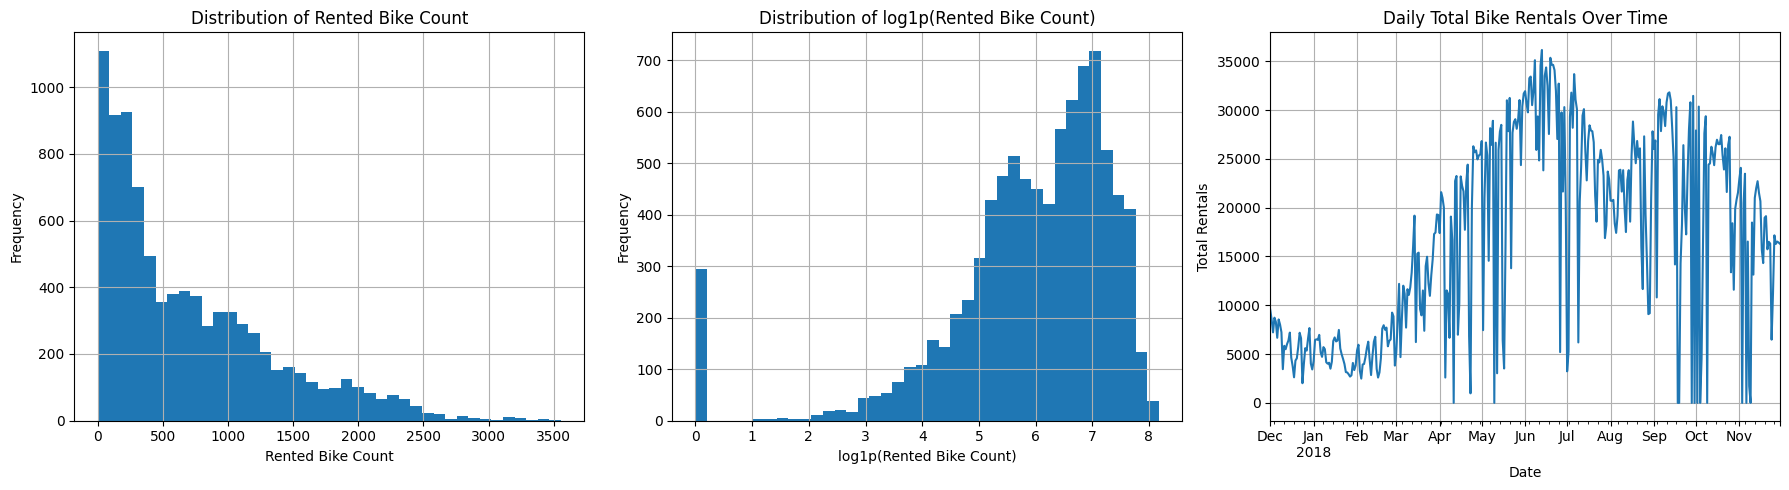

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df["Rented Bike Count"], bins=40)
axes[0].set_title("Distribution of Rented Bike Count")
axes[0].set_xlabel("Rented Bike Count")
axes[0].set_ylabel("Frequency")

axes[1].hist(np.log1p(df["Rented Bike Count"]), bins=40)
axes[1].set_title("Distribution of log1p(Rented Bike Count)")
axes[1].set_xlabel("log1p(Rented Bike Count)")
axes[1].set_ylabel("Frequency")

dailyRentals = df.groupby("Date")["Rented Bike Count"].sum()
dailyRentals.plot(ax=axes[2])
axes[2].set_title("Daily Total Bike Rentals Over Time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Total Rentals")

plt.tight_layout()
plt.show()

The rental counts are heavily right-skewed, but after applying a log transform the distribution becomes much more balanced and easier for models to learn from.
The daily trend plot shows clear seasonality, with rentals rising toward summer and dipping in colder months.

#### Univariate EDA (Numerical)

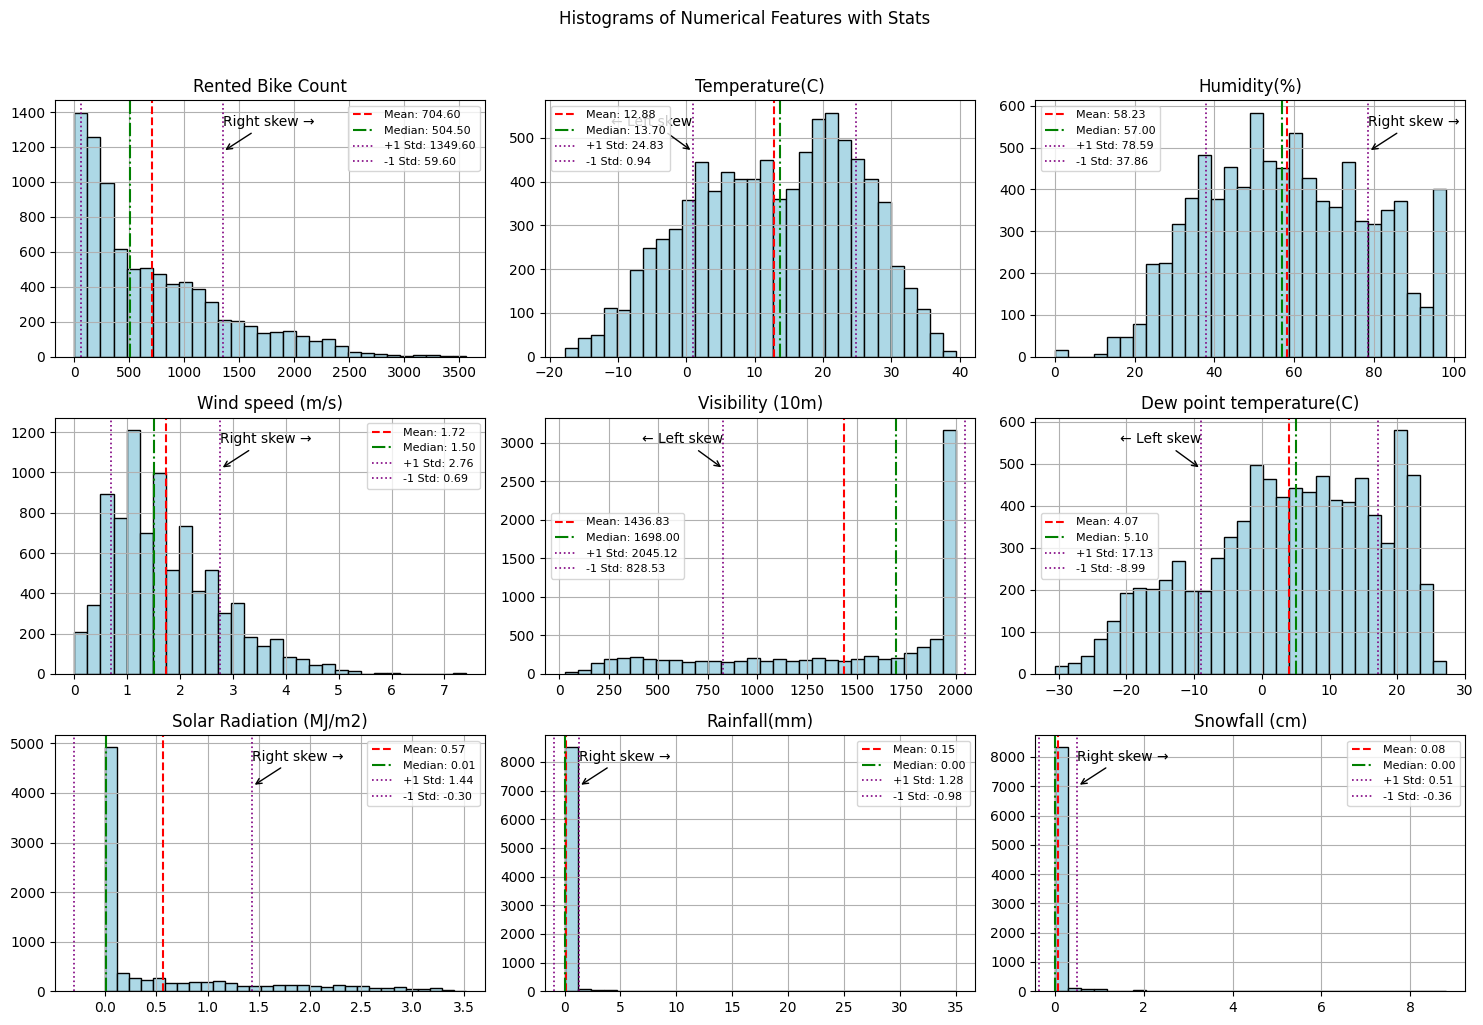

In [9]:
numericCols = [
    "Rented Bike Count",
    "Temperature(C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)",
]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numericCols):
    ax = axes[i]
    data = df[col].dropna()
    
    ax.hist(data, bins=30, color="lightblue", edgecolor="black")
    ax.set_title(col)
    
    mean = data.mean()
    median = data.median()
    std = data.std()
    skew = data.skew()
    
    ax.axvline(mean, color="red", linestyle="--", linewidth=1.5, label=f"Mean: {mean:.2f}")
    ax.axvline(median, color="green", linestyle="-.", linewidth=1.5, label=f"Median: {median:.2f}")
    ax.axvline(mean+std, color="purple", linestyle=":", linewidth=1.2, label=f"+1 Std: {mean+std:.2f}")
    ax.axvline(mean-std, color="purple", linestyle=":", linewidth=1.2, label=f"-1 Std: {mean-std:.2f}")
    
    if skew > 0:
        ax.annotate("Right skew →", xy=(mean+std, ax.get_ylim()[1]*0.8),
                    xytext=(mean+std, ax.get_ylim()[1]*0.9),
                    arrowprops=dict(facecolor="black", arrowstyle="->"),
                    ha="left")
    elif skew < 0:
        ax.annotate("← Left skew", xy=(mean-std, ax.get_ylim()[1]*0.8),
                    xytext=(mean-std, ax.get_ylim()[1]*0.9),
                    arrowprops=dict(facecolor="black", arrowstyle="->"),
                    ha="right")
    
    ax.legend(fontsize=8)

plt.suptitle("Histograms of Numerical Features with Stats", y=1.02)
plt.tight_layout()
plt.show()

Most features look fairly normal, but rentals, wind speed, solar radiation, rainfall, and snowfall show strong right skew due to rare extreme conditions. Visibility and dew point lean slightly left, suggesting the dataset is dominated by typical weather with only a few unusual cases.

#### Univariate EDA (Categorical)

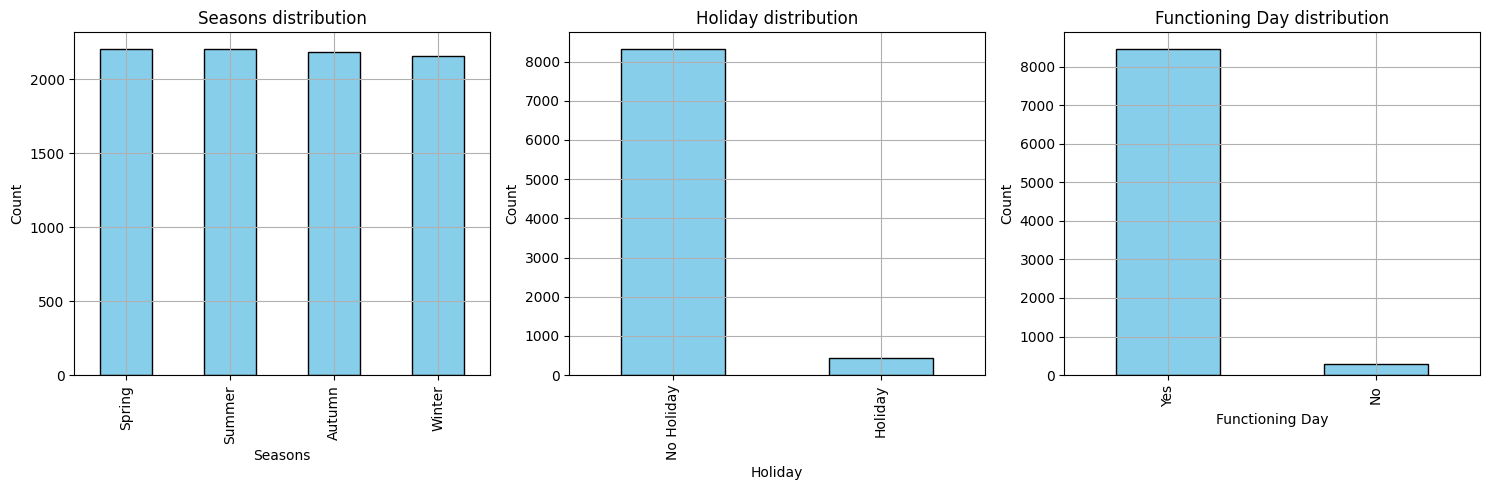

In [10]:
catCols = ["Seasons", "Holiday", "Functioning Day"]

fig, axes = plt.subplots(1, len(catCols), figsize=(15, 5))

for i, col in enumerate(catCols):
    ax = axes[i]
    counts = df[col].value_counts()

    counts.plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(f"{col} distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


Holidays and non-functioning days are very rare compared to regular days, so they won’t have as much influence on the model. Most of the rental activity comes from normal, functioning, non-holiday days, which explains why those conditions dominate the patterns we see.

#### Bivariate EDA
Checking How features relate to rentals

##### Rentals by hour of day | Rentals by Season | Rentals Holiday Vs. Non-Holiday

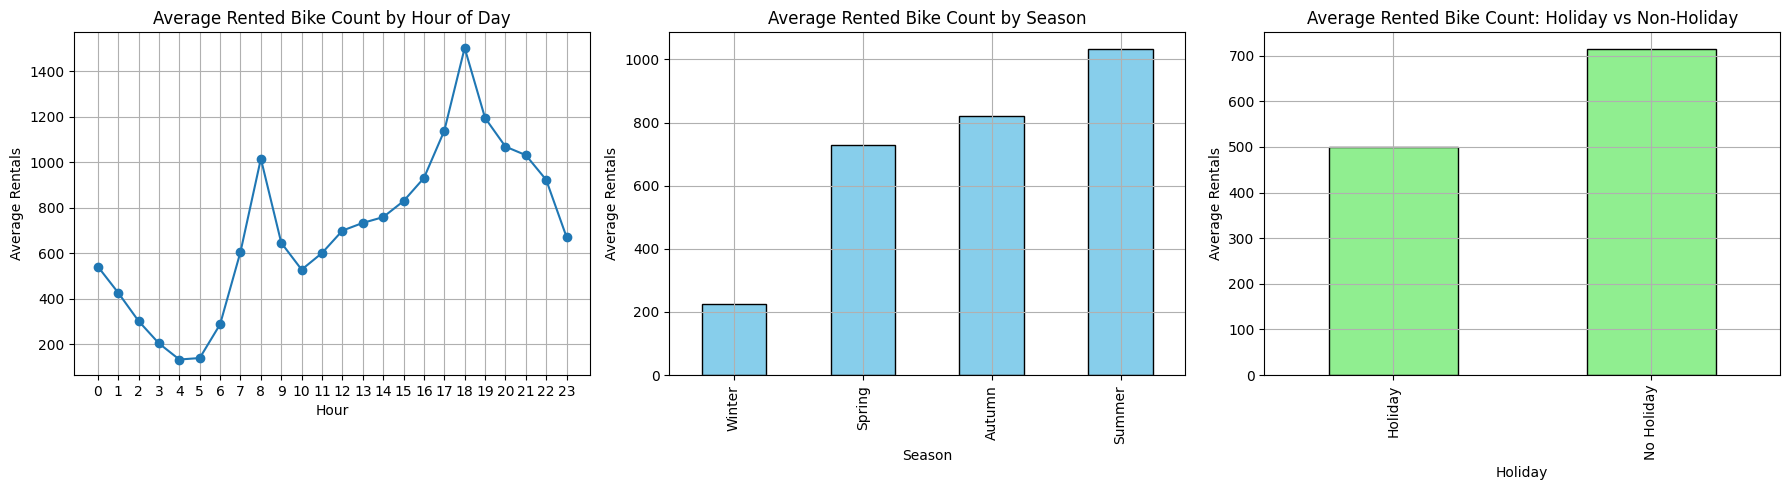

In [11]:
hourlyMean = df.groupby("Hour")["Rented Bike Count"].mean()
seasonMean = df.groupby("Seasons")["Rented Bike Count"].mean().sort_values()
holidayMean = df.groupby("Holiday")["Rented Bike Count"].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

hourlyMean.plot(marker="o", ax=axes[0])
axes[0].set_title("Average Rented Bike Count by Hour of Day")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Average Rentals")
axes[0].set_xticks(range(0, 24))

seasonMean.plot(kind="bar", ax=axes[1], color="skyblue", edgecolor="black")
axes[1].set_title("Average Rented Bike Count by Season")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Average Rentals")

holidayMean.plot(kind="bar", ax=axes[2], color="lightgreen", edgecolor="black")
axes[2].set_title("Average Rented Bike Count: Holiday vs Non-Holiday")
axes[2].set_xlabel("Holiday")
axes[2].set_ylabel("Average Rentals")

plt.tight_layout()
plt.show()

Bike rentals peak during typical commute and evening activity hours, showing clear daily behavior patterns. Rentals also rise in warmer seasons like summer and fall, and drop sharply in winter. Holidays tend to have fewer rentals than regular days, suggesting that most bike usage is driven by routine commuting rather than leisure.

##### Rentals Vs. Temperature
Because depending on the temperature there's a chance someone will rent a bike because nobody is riding the cold, or too hot.

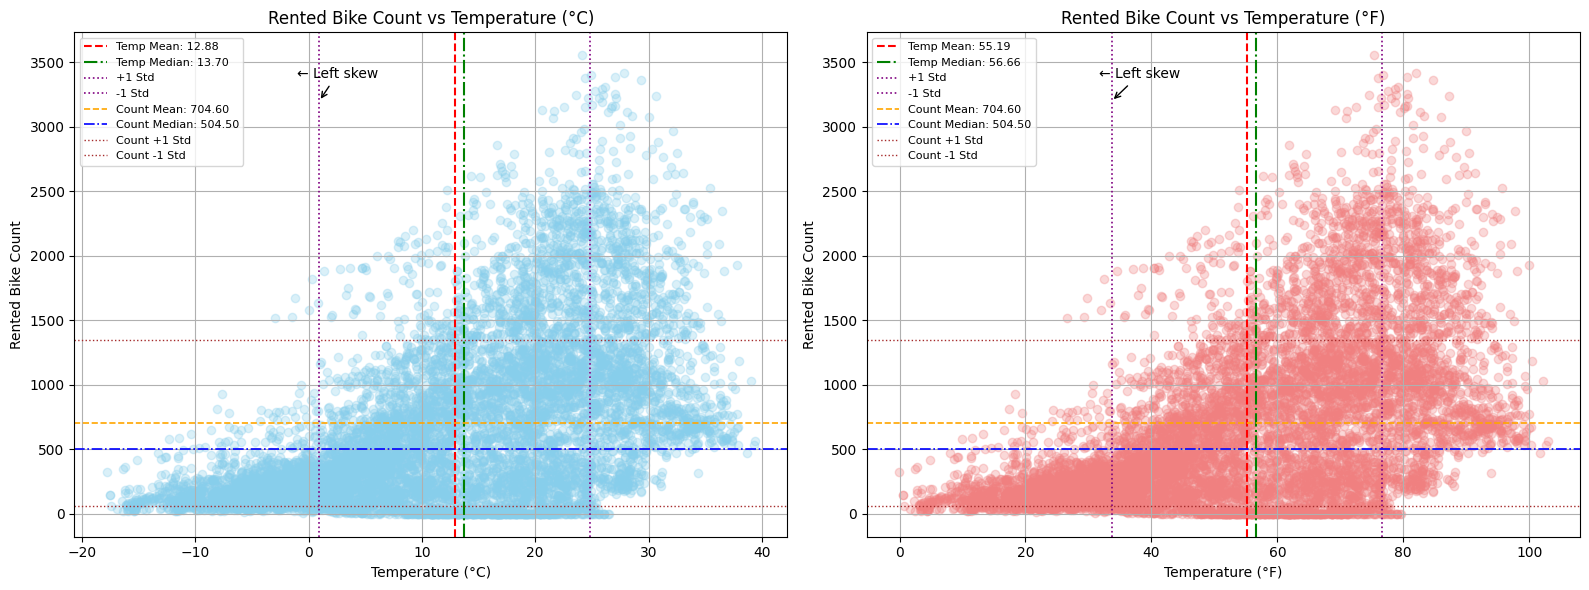

In [12]:
tempC = df["Temperature(C)"].dropna()
rentals = df.loc[tempC.index, "Rented Bike Count"].dropna()
tempC = tempC.loc[rentals.index]
tempF = (tempC * 9/5) + 32

yMean, yMedian, yStd = rentals.mean(), rentals.median(), rentals.std()

def plotTemp(ax, x, rentals, unit, color):
    ax.scatter(x, rentals, alpha=0.3, color=color)
    ax.set_title(f"Rented Bike Count vs Temperature ({unit})")
    ax.set_xlabel(f"Temperature ({unit})")
    ax.set_ylabel("Rented Bike Count")
    
    mean, median, std, skew = x.mean(), x.median(), x.std(), x.skew()
    ax.axvline(mean,   color="red",   ls="--", lw=1.5, label=f"Temp Mean: {mean:.2f}")
    ax.axvline(median, color="green", ls="-.", lw=1.5, label=f"Temp Median: {median:.2f}")
    ax.axvline(mean+std, color="purple", ls=":", lw=1.2, label="+1 Std")
    ax.axvline(mean-std, color="purple", ls=":", lw=1.2, label="-1 Std")
    
    if skew > 0:
        ax.annotate("→ Right skew", xy=(mean+std, rentals.max()*0.9),
                    xytext=(mean+std+2, rentals.max()*0.95),
                    arrowprops=dict(facecolor="black", arrowstyle="->"))
    elif skew < 0:
        ax.annotate("← Left skew", xy=(mean-std, rentals.max()*0.9),
                    xytext=(mean-std-2, rentals.max()*0.95),
                    arrowprops=dict(facecolor="black", arrowstyle="->"))
    
    ax.axhline(yMean,   color="orange", ls="--", lw=1.2, label=f"Count Mean: {yMean:.2f}")
    ax.axhline(yMedian, color="blue",   ls="-.", lw=1.2, label=f"Count Median: {yMedian:.2f}")
    ax.axhline(yMean+yStd, color="brown", ls=":", lw=1.0, label="Count +1 Std")
    ax.axhline(yMean-yStd, color="brown", ls=":", lw=1.0, label="Count -1 Std")
    
    ax.legend(fontsize=8, loc="upper left")

fig, axes = plt.subplots(1, 2, figsize=(16,6))
plotTemp(axes[0], tempC, rentals, "°C", "skyblue")
plotTemp(axes[1], tempF, rentals, "°F", "lightcoral")
plt.tight_layout()
plt.show()

Temperature and bike rentals follow a clear pattern: people ride more in comfortable, mid-range temperatures, and much less when it’s too cold or too hot.

### Data Wrangling

#### Functioning Days
We restrict the dataset to functioning days to avoid modeling days with zero or abnormal operations.

In [13]:
df = df[df["Functioning Day"] == "Yes"].copy()
print("Shape after keeping only Functioning Days:", df.shape)

Shape after keeping only Functioning Days: (8465, 15)


#### Clean Column Names

In [14]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.replace("%", "pct")
    .str.replace("m/s", "ms")
    .str.replace("/", "_")
)
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperaturec', 'humiditypct',
       'wind_speed_ms', 'visibility_10m', 'dew_point_temperaturec',
       'solar_radiation_mj_m2', 'rainfallmm', 'snowfall_cm', 'seasons',
       'holiday', 'functioning_day', 'datetime'],
      dtype='object')

#### Useful time-based features

In [15]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["dayofweek"] = df["datetime"].dt.dayofweek  # Monday=0
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)

### Creating Clean Dataframe to work with

In [16]:
cleanedDf = df.copy()
print("cleanedDf shape:", cleanedDf.shape)

cleanedDf shape: (8465, 19)


## Task 1 - Data Featuring  
I selected a core set meaningful columns that are directly relevant for predicting bike rentals.

In [ ]:
baseFeatures = [
    "rentedBikeCount",
    "hour",
    "TemperatureC",
    "humidityPct",
    "wind_speed_ms",
    "visibility10m",
    "dewPointTemperatureC",
    "solarRadiationMjM2",
    "rainfallMM",
    "snowfallCM",
    "seasons",
    "holiday",
    "year",
    "month",
    "dayofweek",
    "is_weekend",
]
dfFeat = cleanedDf[baseFeatures].copy()
dfFeat.head()

,rented_bike_count,hour,temperaturec,humiditypct,wind_speed_ms,visibility_10m,dew_point_temperaturec,solar_radiation_mj_m2,rainfallmm,snowfall_cm,seasons,holiday,year,month,dayofweek,is_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,4,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,4,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,12,4,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,4,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,4,0


#### Ratio Features  
I created ratio features to capture relationships between weather variables (ex: temperature vs dew point, humidity vs temperature, solar radiation vs visibility).

In [ ]:
dfFeat["tempDewRatio"] = cleanedDf["TemperatureC"] / cleanedDf["dewPointTemperatureC"].replace(0, np.nan)

dfFeat["humidityTemptRatio"] = cleanedDf["humidityPct"] / (cleanedDf["TemperatureC"] + 1)

dfFeat["solarVisibilityRatio"] = cleanedDf["solarRadiationMjM2"] / (cleanedDf["visibility10m"] + 1)

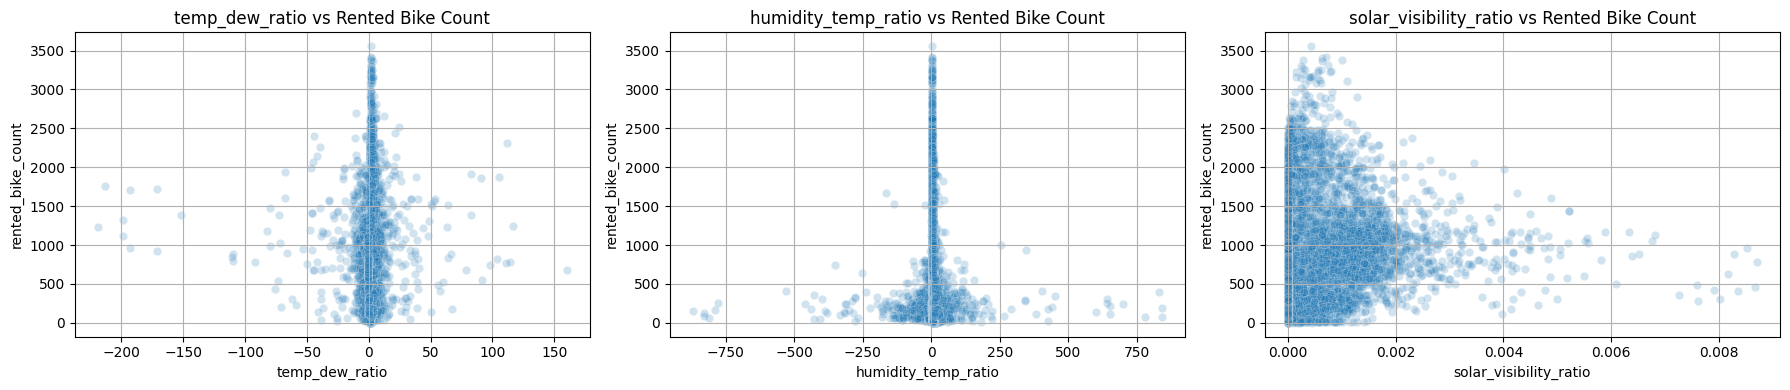

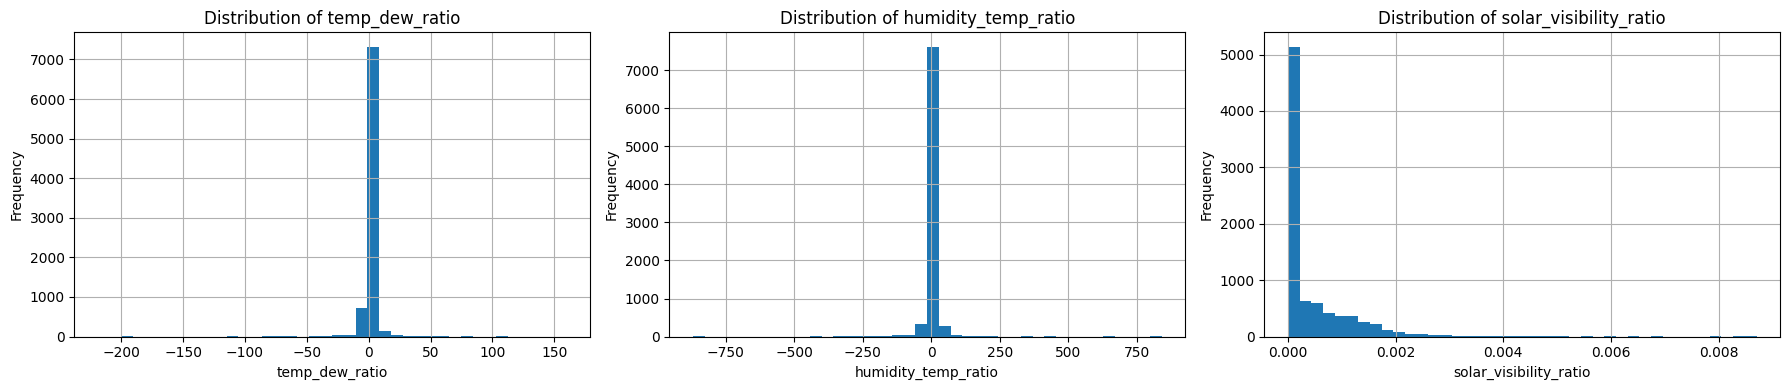

In [ ]:
ratioCols = ["temp_dew_ratio", "humidity_temp_ratio", "solar_visibility_ratio"]

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for ax, col in zip(axes, ratioCols):
    sns.scatterplot(
        data=dfFeat,
        x=col,
        y="rented_bike_count",
        alpha=0.2,
        ax=ax
    )
    ax.set_title(f"{col} vs Rented Bike Count")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for ax, col in zip(axes, ratioCols):
    ax.hist(dfFeat[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=40)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

These new ratio columns are successfully added and show wide variation, especially `tempDewRatio` and `humidityTemptRatio`, which highlight extreme feels like conditions. Some ratios can explode, but we will handle these later.

#### Difference Features  
I added difference features like `tempMinusDew` and `rainMinusSnow` to measure contrasts (how humid it feels or whether rain or snow is peak). These help the model understand "type of weather".

In [ ]:
# Temp - dew point
dfFeat["tempMinusDew"] = cleanedDf["TemperatureC"] - cleanedDf["dewPointTemperatureC"]

# Rainfall vs Snowfall
dfFeat["rainMinusSnow"] = cleanedDf["rainfallMM"] - cleanedDf["snowfallCM"]

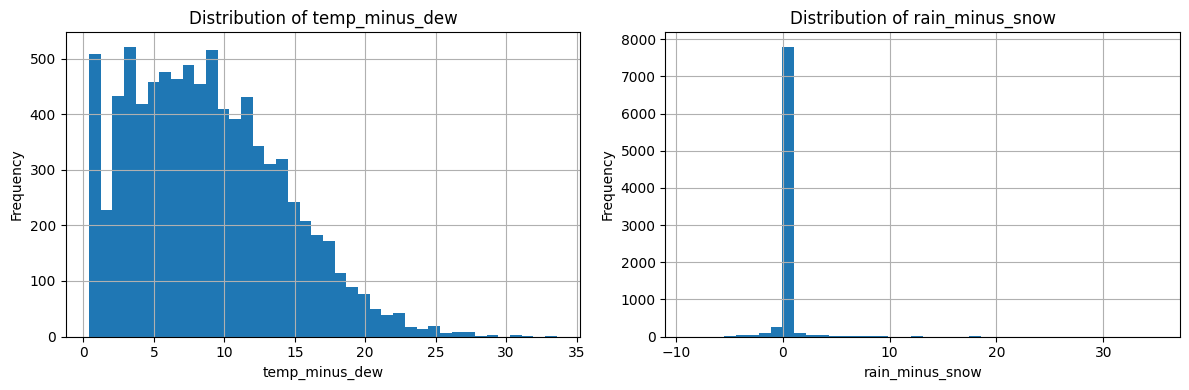

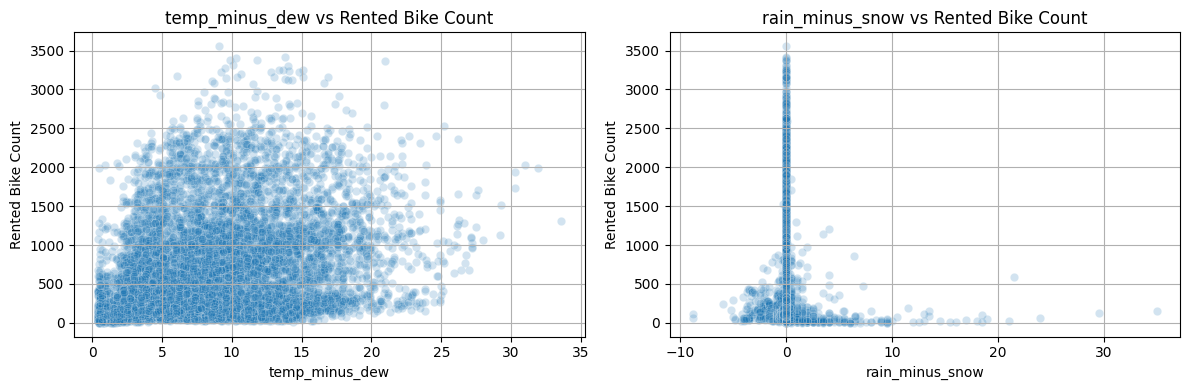

In [ ]:
diffCols = ["tempMinusDew", "rainMinusSnow"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col in zip(axes, diffCols):
    ax.hist(dfFeat[col], bins=40)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col in zip(axes, diffCols):
    sns.scatterplot(
        data=dfFeat,
        x=col,
        y="rentedBikeCount",
        alpha=0.2,
        ax=ax
    )
    ax.set_title(f"{col} vs Rented Bike Count")
    ax.set_xlabel(col)
    ax.set_ylabel("Rented Bike Count")

plt.tight_layout()
plt.show()

`tempMinusDew` ranges roughly from near 0 up to the low 30s, showing how much warmer the air is than the dew point on a typical hour. `rainMinusSnow` is zero most of the time (no precipitation), with a few positive and negative outliers capturing rain-heavy and snow-heavy hours.

#### Non-linear Transformations  
I applied log, square root, and squared transforms to temperature and humidity to capture curved relationships (like “too cold or too hot is bad, middle is best”).

In [ ]:
dfFeat["log_temp"] = np.log1p(cleanedDf["TemperatureC"].clip(lower=0))
dfFeat["sqrt_humidity"] = np.sqrt(cleanedDf["humidityPct"])
dfFeat["temp_sq"] = cleanedDf["TemperatureC"] ** 2
dfFeat["humidity_sq"] = cleanedDf["humidityPct"] ** 2

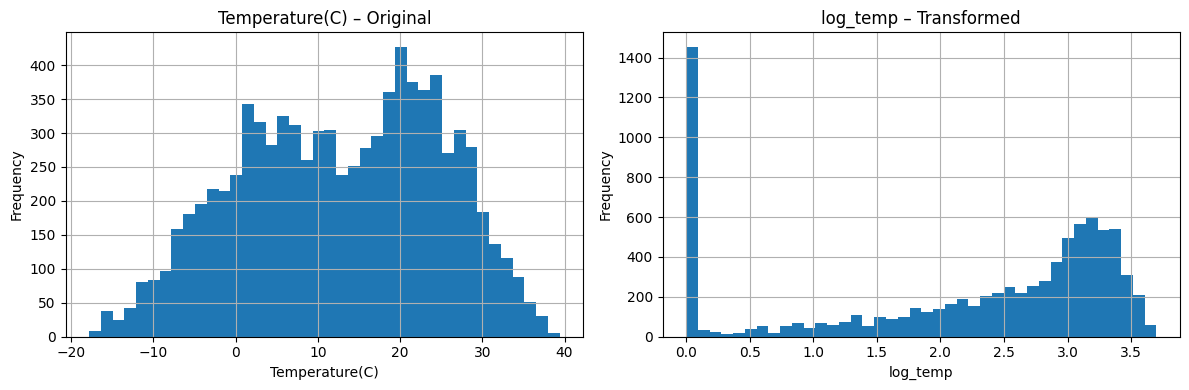

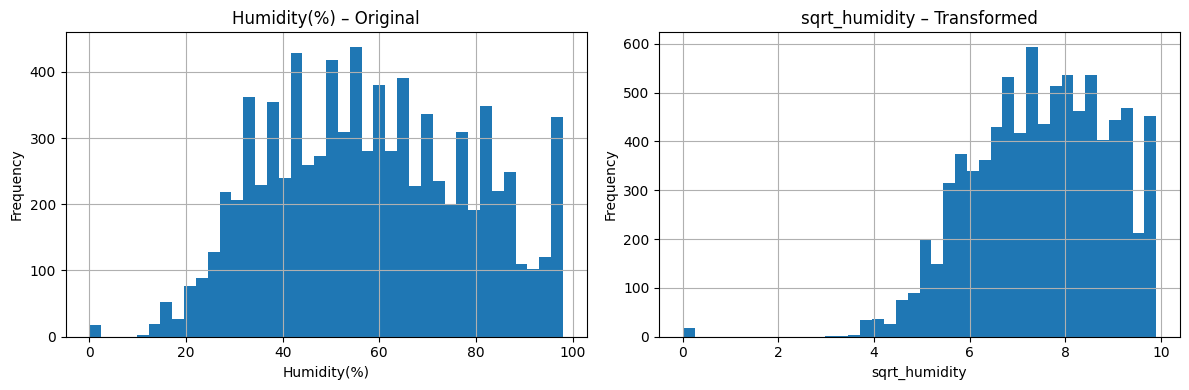

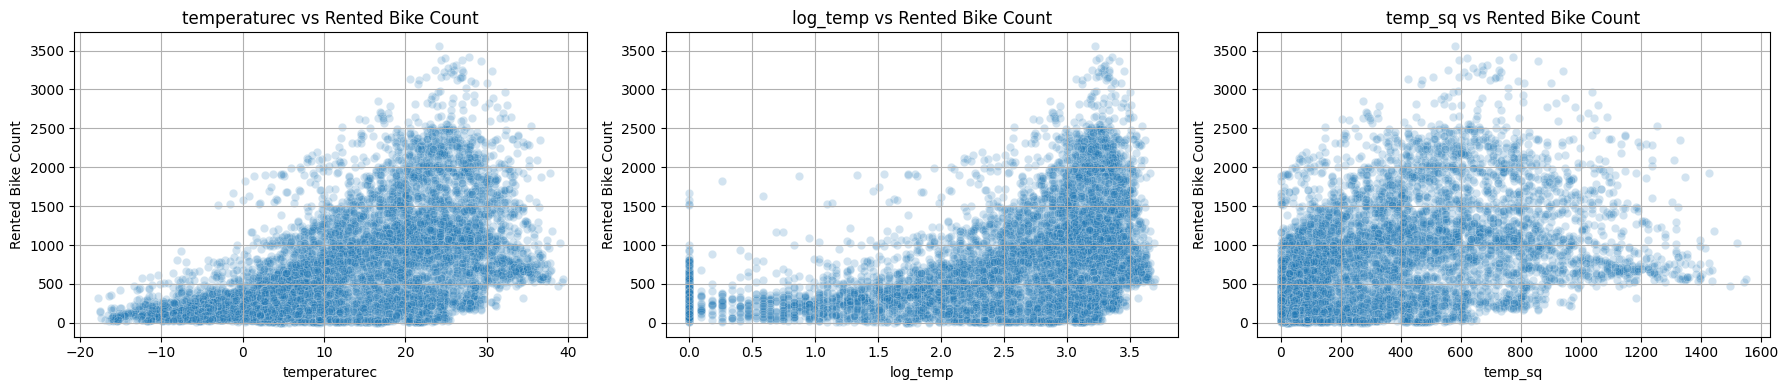

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(dfFeat["TemperatureC"], bins=40)
axes[0].set_title("Temperature(C) – Original")
axes[0].set_xlabel("Temperature(C)")
axes[0].set_ylabel("Frequency")

axes[1].hist(dfFeat["log_temp"], bins=40)
axes[1].set_title("log_temp – Transformed")
axes[1].set_xlabel("log_temp")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(dfFeat["humidityPct"], bins=40)
axes[0].set_title("Humidity(%) – Original")
axes[0].set_xlabel("Humidity(%)")
axes[0].set_ylabel("Frequency")

axes[1].hist(dfFeat["sqrt_humidity"], bins=40)
axes[1].set_title("sqrt_humidity – Transformed")
axes[1].set_xlabel("sqrt_humidity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for ax, col in zip(axes, ["TemperatureC", "log_temp", "temp_sq"]):
    sns.scatterplot(
        data=dfFeat,
        x=col,
        y="rentedBikeCount",
        alpha=0.2,
        ax=ax
    )
    ax.set_title(f"{col} vs Rented Bike Count")
    ax.set_xlabel(col)
    ax.set_ylabel("Rented Bike Count")

plt.tight_layout()
plt.show()

The transformed features (`log_temp`, `sqrt_humidity`, `temp_sq`, `humidity_sq`) span reasonable numeric ranges with no missing values and reflect the curved patterns in temperature and humidity.

#### Encode Categorical Variables  
Converted `seasons` and `holiday` into dummy variables so models can use them as numeric inputs. Dropping the first category avoids redundancy.


In [24]:
dfFeat = pd.get_dummies(dfFeat, columns=["seasons", "holiday"], drop_first=True)
dfFeat.head()

,rented_bike_count,hour,temperaturec,humiditypct,wind_speed_ms,visibility_10m,dew_point_temperaturec,solar_radiation_mj_m2,rainfallmm,snowfall_cm,year,month,dayofweek,is_weekend,temp_dew_ratio,humidity_temp_ratio,solar_visibility_ratio,temp_minus_dew,rain_minus_snow,log_temp,sqrt_humidity,temp_sq,humidity_sq,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,4,0,0.295455,-8.809524,0.0,12.4,0.0,0.0,6.082763,27.04,1369,False,False,True,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,4,0,0.312500,-8.444444,0.0,12.1,0.0,0.0,6.164414,30.25,1444,False,False,True,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,4,0,0.338983,-7.800000,0.0,11.7,0.0,0.0,6.244998,36.00,1521,False,False,True,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,4,0,0.352273,-7.692308,0.0,11.4,0.0,0.0,6.324555,38.44,1600,False,False,True,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,4,0,0.322581,-7.200000,0.0,12.6,0.0,0.0,6.000000,36.00,1296,False,False,True,True


We now have dummy columns like `seasons_Spring`, `seasons_Summer`, `seasons_Winter`, and `holiday_No Holiday`, and the dataset grows to 27 columns. All categorical information is now numeric.

#### Scale Numerical Features  
I separated target (`y`) and features (`X`), forced all feature columns to numeric, handled infinities and missing values, and then standardized everything with `StandardScaler`.

In [ ]:
y = dfFeat["rentedBikeCount"].copy()
X = dfFeat.drop(columns=["rentedBikeCount"]).copy()
X = X.apply(pd.to_numeric, errors="coerce")

X = X.replace([np.inf, -np.inf], np.nan)

X = X.fillna(X.median(numeric_only=True))
X = X.astype("float64")
print("Total NaNs:", X.isna().sum().sum())
scaler = StandardScaler()
xScaled = scaler.fit_transform(X)

xScaled = pd.DataFrame(xScaled, columns=X.columns)
xScaled.head()

Total NaNs: 0


,hour,temperaturec,humiditypct,wind_speed_ms,visibility_10m,dew_point_temperaturec,solar_radiation_mj_m2,rainfallmm,snowfall_cm,year,month,dayofweek,is_weekend,temp_dew_ratio,humidity_temp_ratio,solar_visibility_ratio,temp_minus_dew,rain_minus_snow,log_temp,sqrt_humidity,temp_sq,humidity_sq,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday
0,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.062872,-0.266586,-0.564113,0.666983,-0.059217,-1.794537,-0.995354,-0.877886,-0.991010,-0.585308,-0.594041,1.708503,0.225032
1,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.061141,-0.258587,-0.564113,0.610996,-0.059217,-1.794537,-0.937712,-0.867913,-0.960444,-0.585308,-0.594041,1.708503,0.225032
2,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.058452,-0.244467,-0.564113,0.536347,-0.059217,-1.794537,-0.880823,-0.850048,-0.929063,-0.585308,-0.594041,1.708503,0.225032
3,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.057103,-0.242108,-0.564113,0.480359,-0.059217,-1.794537,-0.824659,-0.842468,-0.896868,-0.585308,-0.594041,1.708503,0.225032
4,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.060118,-0.231321,-0.564113,0.704308,-0.059217,-1.794537,-1.053780,-0.850048,-1.020760,-0.585308,-0.594041,1.708503,0.225032


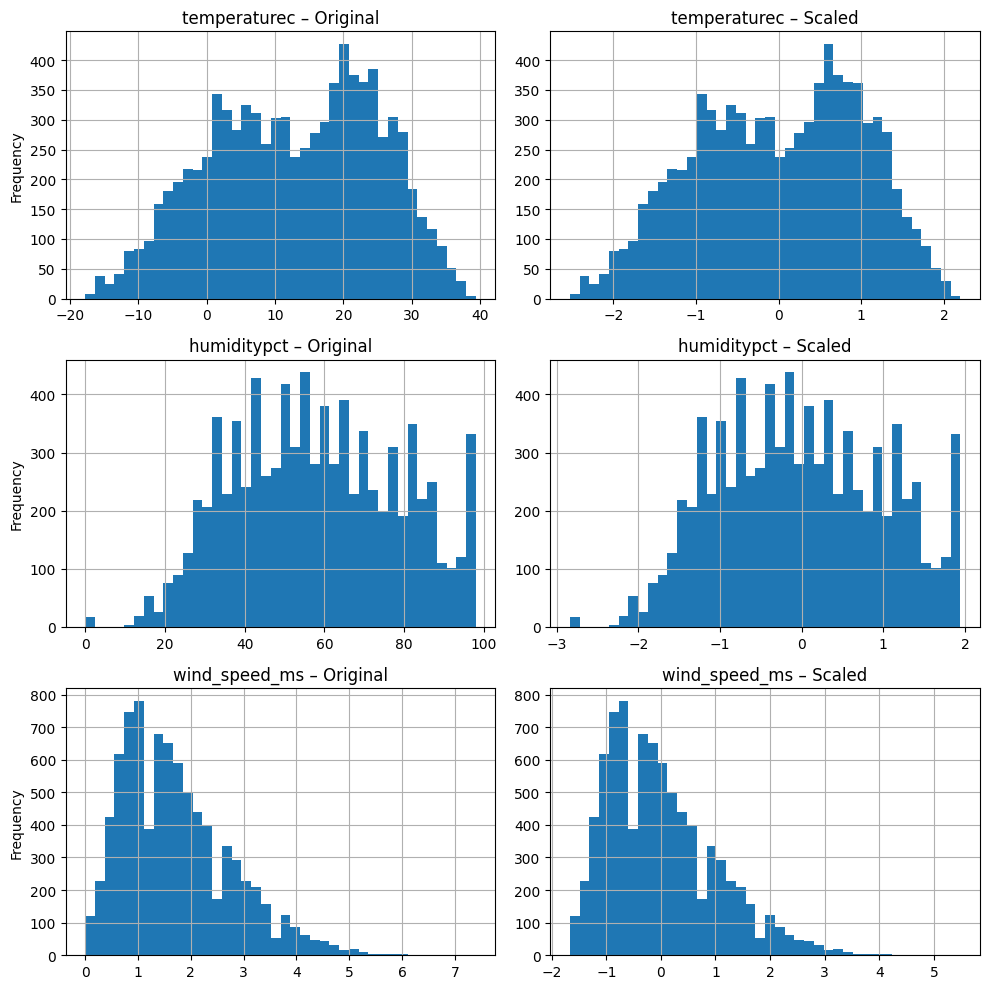

,mean,std
hour,1.208720e-16,1.000059
temperaturec,-4.029067e-17,1.000059
humiditypct,9.233278e-17,1.000059
wind_speed_ms,1.435355e-16,1.000059
visibility_10m,-5.036334e-18,1.000059
dew_point_temperaturec,-4.029067e-17,1.000059
solar_radiation_mj_m2,1.343022e-17,1.000059
rainfallmm,2.518167e-18,1.000059
snowfall_cm,3.693311e-17,1.000059
year,9.770151e-14,1.000059


In [ ]:
numericExampleCols = ["TemperatureC", "humidityPct", "wind_speed_ms"]

fig, axes = plt.subplots(len(numericExampleCols), 2, figsize=(10, 10))

for i, col in enumerate(numericExampleCols):
    axes[i, 0].hist(X[col], bins=40)
    axes[i, 0].set_title(f"{col} – Original")
    axes[i, 0].set_ylabel("Frequency")

    axes[i, 1].hist(xScaled[col], bins=40)
    axes[i, 1].set_title(f"{col} – Scaled")
    
plt.tight_layout()
plt.show()

xScaled.describe().T[["mean", "std"]].head(10)

After coercing to numeric, replacing infinities, and filling NaNs with medians, the total number of missing values in `X` is 0. The scaled features (`X_scaled`) all have means approximately 0 and standard deviations close to 1, confirming that `StandardScaler` is working.


#### Final processed dataset  
I combined the scaled features (`X_scaled`) with the original target (`y`) into `processed_df`. Now we have a fully engineered dataset ready for Model Building.

In [ ]:
processedDf = pd.concat([y.reset_index(drop=True), xScaled], axis=1)
processedDf.head()

print("First column name:", processedDf.columns[0])
print("Columns in processedDf:", processedDf.columns.tolist())

,rented_bike_count,hour,temperaturec,humiditypct,wind_speed_ms,visibility_10m,dew_point_temperaturec,solar_radiation_mj_m2,rainfallmm,snowfall_cm,year,month,dayofweek,is_weekend,temp_dew_ratio,humidity_temp_ratio,solar_visibility_ratio,temp_minus_dew,rain_minus_snow,log_temp,sqrt_humidity,temp_sq,humidity_sq,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday
0,254,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.062872,-0.266586,-0.564113,0.666983,-0.059217,-1.794537,-0.995354,-0.877886,-0.991010,-0.585308,-0.594041,1.708503,0.225032
1,204,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.061141,-0.258587,-0.564113,0.610996,-0.059217,-1.794537,-0.937712,-0.867913,-0.960444,-0.585308,-0.594041,1.708503,0.225032
2,173,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.058452,-0.244467,-0.564113,0.536347,-0.059217,-1.794537,-0.880823,-0.850048,-0.929063,-0.585308,-0.594041,1.708503,0.225032
3,107,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.057103,-0.242108,-0.564113,0.480359,-0.059217,-1.794537,-0.824659,-0.842468,-0.896868,-0.585308,-0.594041,1.708503,0.225032
4,78,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,-3.221442,1.610881,0.49307,-0.636563,-0.060118,-0.231321,-0.564113,0.704308,-0.059217,-1.794537,-1.053780,-0.850048,-1.020760,-0.585308,-0.594041,1.708503,0.225032


## Task 2 – Model Building  

In this part, I'm basically asking: “Given the weather and time info, how well can I guess the bike rentals?”  
I try a few simple regression models, look at their error numbers (MAE, MSE) and how much variation they explain (R²), and then compare them.


### Train/Test Split  
I split `processed_df` into training (80%) and testing (20%) sets so I can train models on one portion and objectively evaluate them on unseen data. Using `random_state=42` makes the split reproducible.


In [ ]:
X = processedDf.drop("rentedBikeCount", axis=1)
y = processedDf["rentedBikeCount"]

xTrain, xTest, yTrain, yTest = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xTrain.shape, xTest.shape

((6772, 26), (1693, 26))

80% of data for training, 20% hold-out for testing.

random_state=42 makes splits reproducible.

Generalization Performance

#### Linear Regression  
I started with a plain Linear Regression as a baseline model, which learns a weighted sum of all features to predict bike rentals. Its MAE, MSE, and R² serve as a reference point to see if regularized models can do better.


In [29]:
linReg = LinearRegression()
linReg.fit(xTrain, yTrain)

yPredLr = linReg.predict(xTest)

lrMae = mean_absolute_error(yTest, yPredLr)
lrMse = mean_squared_error(yTest, yPredLr)
lrR2  = r2_score(yTest, yPredLr)

lrMae, lrMse, lrR2

(311.2620929958177, 163752.34558915943, 0.5828883495255905)

The baseline linear model explains a bit more than half of the changes in hourly rentals (R² is a little above 0.5).  
On average, it is off by a few hundred bikes per hour, which is my reference point for judging the other models.


### Ridge Regression  
I used Ridge Regression (L2 regularization) to shrink large coefficients and reduce overfitting, especially with correlated and engineered features. GridSearchCV helped choose the best `alpha`, and I compared the metrics to Linear Regression to see if it improved stability or performance.

In [30]:
ridgeParams = {"alpha": [0.1, 1, 5, 10, 20, 50, 100]}

ridge = Ridge()
ridgeGrid = GridSearchCV(ridge, ridgeParams, cv=5, scoring="neg_mean_squared_error")
ridgeGrid.fit(xTrain, yTrain)

ridgeBest = ridgeGrid.best_estimator_
yPredRidge = ridgeBest.predict(xTest)

ridgeMae = mean_absolute_error(yTest, yPredRidge)
ridgeMse = mean_squared_error(yTest, yPredRidge)
ridgeR2  = r2_score(yTest, yPredRidge)

ridgeGrid.best_params_, ridgeMae, ridgeMse, ridgeR2

({'alpha': 0.1}, 311.31390809186854, 163777.413390889, 0.582824496564489)

Ridge with a small alpha ends up very close to plain Linear Regression.  
Helps the model a bit more stable without really changing the overall accuracy.


### Lasso Regression  
I applied Lasso Regression (L1 regularization), which can push some coefficients to zero and effectively perform feature selection. I increased `max_iter` and tuned `alpha` with GridSearchCV to handle convergence issues and evaluate whether a sparser model maintains similar predictive power.


In [31]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

lassoParams = {"alpha": [0.01, 0.1, 1, 5, 10, 20, 50]}

lasso = Lasso(max_iter=20000)

lassoGrid = GridSearchCV(
    lasso,
    lassoParams,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
lassoGrid.fit(xTrain, yTrain)

lassoBest = lassoGrid.best_estimator_
yPredLasso = lassoBest.predict(xTest)

lassoMae = mean_absolute_error(yTest, yPredLasso)
lassoMse = mean_squared_error(yTest, yPredLasso)
lassoR2  = r2_score(yTest, yPredLasso)

lassoGrid.best_params_, lassoMae, lassoMse, lassoR2

({'alpha': 0.01}, 311.2791288795149, 163763.17117254328, 0.5828607744888097)

Lasso gives very similar results to Linear and Ridge.  
Simplify the model and highlight which features matter more, rather than a way to get a huge accuracy boost.


### Elastic Net Regression  
Trained Elastic Net model, which combines L1 and L2 penalties to balance shrinkage. I let the model find the best mix between these behaviors and then compared its test performance to the other models.


In [32]:
elasticParams = {
    "alpha": [0.01, 0.1, 1, 5, 10, 20],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic = ElasticNet(max_iter=20000)
elasticGrid = GridSearchCV(
    elastic,
    elasticParams,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
elasticGrid.fit(xTrain, yTrain)

elasticBest = elasticGrid.best_estimator_
yPredElastic = elasticBest.predict(xTest)

elasticMae = mean_absolute_error(yTest, yPredElastic)
elasticMse = mean_squared_error(yTest, yPredElastic)
elasticR2  = r2_score(yTest, yPredElastic)

elasticGrid.best_params_, elasticMae, elasticMse, elasticR2

({'alpha': 0.01, 'l1_ratio': 0.9},
 313.1159684867221,
 165409.33651293366,
 0.5786676452874319)

Elastic Net also lands in the same range as the other models.  
It mixes the ideas of Ridge and Lasso, so it shrinks some weights and zeroes out others, keeping a balance between stability and simplicity.


### Model Performance Comparison  
I collected MAE, MSE, and R² for Linear, Ridge, Lasso, and Elastic Net into a single results table. Now I can quickly see whether regularization helped, which model best balances bias, and whether simpler models perform close to the rest.


In [33]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso", "Elastic Net"],
    "MAE": [lrMae, ridgeMae, lassoMae, elasticMae],
    "MSE": [lrMse, ridgeMse, lassoMse, elasticMse],
    "R²":  [lrR2, ridgeR2, lassoR2, elasticR2]
})

results

,Model,MAE,MSE,R²
0,Linear Regression,311.262093,163752.345589,0.582888
1,Ridge,311.313908,163777.413391,0.582824
2,Lasso,311.279129,163763.171173,0.582861
3,Elastic Net,313.115968,165409.336513,0.578668


All four models give very similar MAE, MSE, and R² values, so regularization doesn’t change accuracy that much here.  
The choice is more about whether I want a simple full model or a slightly simpler, more “cleaned up” one.

## Task 3 – Polynomial Features  

Here I wanted to see what happens if I let the model learn curved patterns instead of only straight lines.  
I create extra “polynomial” versions of a few weather features, train new models on them, and then compare these to the earlier models.


In [ ]:
polyCols = ["TemperatureC", "humidityPct", "wind_speed_ms", "solarRadiationMjM2"]

xTrain_poly_base = xTrain[polyCols].copy()
xTest_poly_base  = xTest[polyCols].copy()

poly = PolynomialFeatures(degree=2, include_bias=False)

xTrain_poly = poly.fit_transform(xTrain_poly_base)
xTest_poly  = poly.transform(xTest_poly_base)

polyFeatureNames = poly.get_feature_names_out(polyCols)

len(polyFeatureNames), polyFeatureNames[:10]

(14,
 array(['temperaturec', 'humiditypct', 'wind_speed_ms',
        'solar_radiation_mj_m2', 'temperaturec^2',
        'temperaturec humiditypct', 'temperaturec wind_speed_ms',
        'temperaturec solar_radiation_mj_m2', 'humiditypct^2',
        'humiditypct wind_speed_ms'], dtype=object))

The polynomial transformer expands each original feature into:
- its squared value (temp²)
- interaction terms (temp × humidity)


In [35]:
linRegPoly = LinearRegression()
linRegPoly.fit(xTrain_poly, yTrain)

yPredLinPoly = linRegPoly.predict(xTest_poly)

linPolyMae = mean_absolute_error(yTest, yPredLinPoly)
linPolyMse = mean_squared_error(yTest, yPredLinPoly)
linPolyR2  = r2_score(yTest, yPredLinPoly)

linPolyMae, linPolyMse, linPolyR2

(330.8838845209027, 195786.29023433855, 0.5012911579001346)

This is still a linear model, but now it is working on curved versions of the weather features.  
If the R² number goes up to the basic Linear model, it means these extra curved features are actually helping.

In [36]:
ridge_poly = Ridge(alpha=1.0)
ridge_poly.fit(xTrain_poly, yTrain)

yPredRidge_poly = ridge_poly.predict(xTest_poly)

ridgePolyMae = mean_absolute_error(yTest, yPredRidge_poly)
ridgePolyMse = mean_squared_error(yTest, yPredRidge_poly)
ridgePolyR2  = r2_score(yTest, yPredRidge_poly)

ridgePolyMae, ridgePolyMse, ridgePolyR2

(330.89007223758017, 195785.11126253454, 0.501294160989179)

Ridge with polynomial features tries to keep a good balance

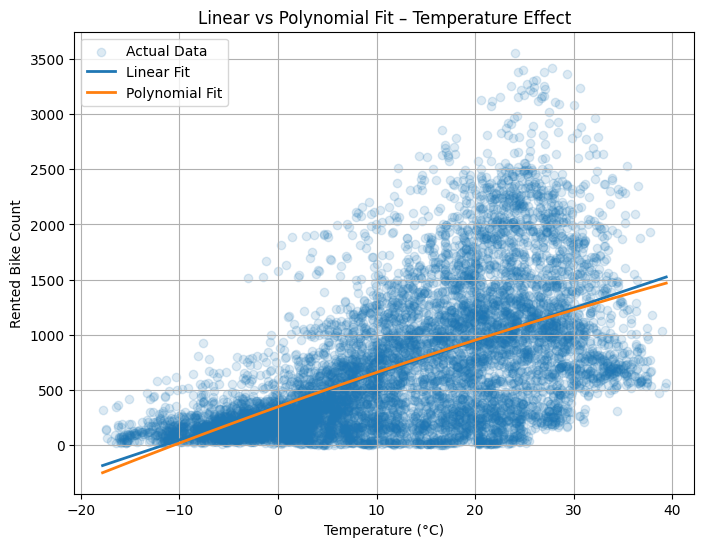

In [ ]:
temp = cleanedDf["TemperatureC"].values.reshape(-1, 1)
rentals = cleanedDf["rentedBikeCount"].values

# Linear model on temp only
linTempModel = LinearRegression()
linTempModel.fit(temp, rentals)

# Polynomial model on temp only
polyTempModel = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin", LinearRegression())
])
polyTempModel.fit(temp, rentals)

tempGrid = np.linspace(temp.min(), temp.max(), 200).reshape(-1, 1)
predLinGrid = linTempModel.predict(tempGrid)
predPolyGrid = polyTempModel.predict(tempGrid)

plt.figure(figsize=(8, 6))
plt.scatter(temp, rentals, alpha=0.15, label="Actual Data")
plt.plot(tempGrid, predLinGrid, label="Linear Fit", linewidth=2)
plt.plot(tempGrid, predPolyGrid, label="Polynomial Fit", linewidth=2)
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.title("Linear vs Polynomial Fit – Temperature Effect")
plt.legend()
plt.show()

You can see that rentals go up around comfortable temperatures and drop when it gets too cold or too hot, and the curved line captures that better.


In [38]:
resultsTask3 = pd.DataFrame({
    "Model": [
        "Linear Regression (baseline)",
        "Ridge (baseline)",
        "Linear + Polynomial",
        "Ridge + Polynomial"
    ],
    "MAE": [lrMae, ridgeMae, linPolyMae, ridgePolyMae],
    "MSE": [lrMse, ridgeMse, linPolyMse, ridgePolyMse],
    "R²":  [lrR2, ridgeR2, linPolyR2, ridgePolyR2],
})

resultsTask3

,Model,MAE,MSE,R²
0,Linear Regression (baseline),311.262093,163752.345589,0.582888
1,Ridge (baseline),311.313908,163777.413391,0.582824
2,Linear + Polynomial,330.883885,195786.290234,0.501291
3,Ridge + Polynomial,330.890072,195785.111263,0.501294


This table helps me see, side by side, how the polynomial models stack up against the original linear ones.  
If the polynomial Ridge model has higher R² and lower errors, then it is doing a better job at following the true rental behavior.


In [39]:
candidateModels = {
    "linear_all": (linReg, lrR2),
    "ridge_all": (ridgeBest, ridgeR2),
    "linear_poly": (linRegPoly, linPolyR2),
    "ridge_poly": (ridge_poly, ridgePolyR2),
}

bestName, (bestModel, bestR2) = max(candidateModels.items(), key=lambda x: x[1][1])

print("Best model:", bestName)
print("Best R²:", bestR2)

joblib.dump(bestModel, f"{bestName}.pkl")

Best model: linear_all
Best R²: 0.5828883495255905


['linear_all.pkl']

The model with the highest R² is saved as my final trained model.
This is the model that best captures both linear and curved relationships in the weather and time features.


### Task 4 – Model Evaluation & Validation  

I want to check how reliable the models are.  


In [40]:
# Linear model
linModel = LinearRegression()
linModel.fit(xTrain, yTrain)

polyModel = linRegPoly

# Cross-validation
cvLin = cross_val_score(linModel, xTrain, yTrain, cv=5, scoring="r2")
cvPoly = cross_val_score(polyModel, xTrain, yTrain, cv=5, scoring="r2")

cvLin.mean(), cvPoly.mean()

(np.float64(0.5680196209944965), np.float64(0.5680196209944965))

Both models are performing almost the same, because their cross-validation R² scores are nearly identical (~0.568).

In [41]:
# Predictions
yPredLinTest = linModel.predict(xTest)
y_pred_polyTest = polyModel.predict(xTest_poly)

resultsTask4 = pd.DataFrame({
    "Model": ["Linear", "Polynomial (deg=2)"],
    "MAE": [
        mean_absolute_error(yTest, yPredLinTest),
        mean_absolute_error(yTest, y_pred_polyTest)
    ],
    "MSE": [
        mean_squared_error(yTest, yPredLinTest),
        mean_squared_error(yTest, y_pred_polyTest)
    ],
    "R²": [
        r2_score(yTest, yPredLinTest),
        r2_score(yTest, y_pred_polyTest)
    ]
})

resultsTask4

,Model,MAE,MSE,R²
0,Linear,311.262093,163752.345589,0.582888
1,Polynomial (deg=2),330.883885,195786.290234,0.501291


The linear model actually performs better than the polynomial model here — it has lower MAE and MSE, and a higher R², meaning it predicts more accurately on new data.

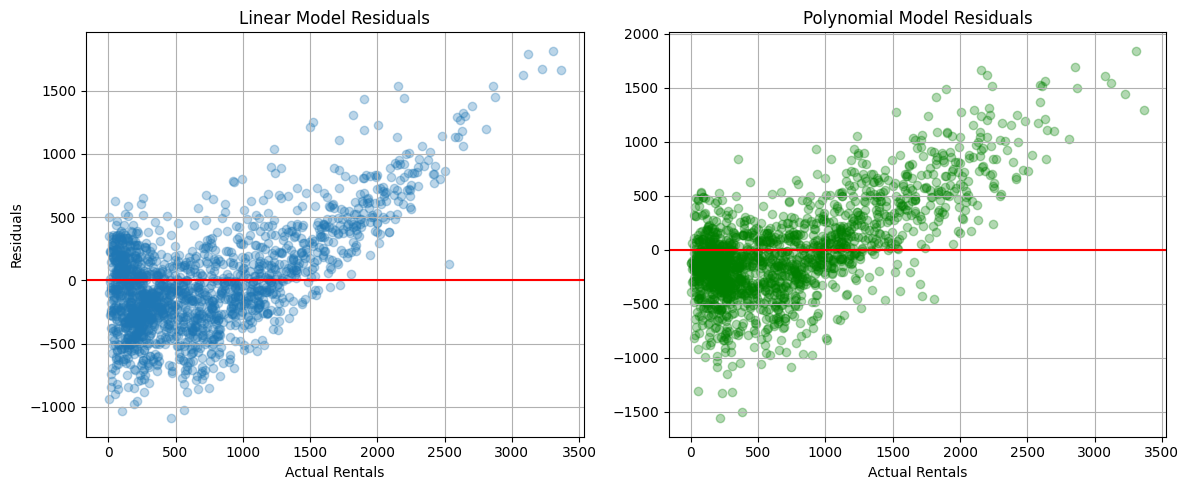

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(yTest, yTest - yPredLinTest, alpha=0.3)
plt.axhline(0, color="red")
plt.title("Linear Model Residuals")
plt.xlabel("Actual Rentals")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(yTest, yTest - y_pred_polyTest, alpha=0.3, color="green")
plt.axhline(0, color="red")
plt.title("Polynomial Model Residuals")
plt.xlabel("Actual Rentals")

plt.tight_layout()
plt.show()

Both models still struggle with higher rental counts, but the polynomial model spreads the errors even more, showing bigger swings and less stability.

In [43]:
featureImportance = pd.Series(
    linModel.coef_,
    index=xTrain.columns
).sort_values(key=abs, ascending=False)

featureImportance.head(15)

humiditypct               1866.991750
humidity_sq              -1148.001163
sqrt_humidity             -596.439572
temp_minus_dew             359.608463
seasons_Winter            -306.218915
hour                       197.216029
temperaturec               194.063388
seasons_Spring            -166.543988
year                      -152.527563
month                     -150.240645
seasons_Summer            -106.139344
solar_radiation_mj_m2      -74.804961
log_temp                    66.991726
is_weekend                 -56.200196
dew_point_temperaturec      31.866539
dtype: float64

### Business implications  
The models suggest that comfortable weather (good temperature, clear visibility, little rain) goes hand-in-hand with more bike rentals.  
This can help a bike-sharing team plan maintenance, and promotions around weather and weekend patterns.


### Recommendations  
Only keep extra features (like polynomial ones) if they actually make the model better.</br>
If the model starts getting confused, try simpler versions of it.</br>
In the future, I can explore other models or add more time-based info to make predictions smoother.</br>
Checking results across different seasons or months can help understand patterns better.</br>


### Final Reflection

This whole project was my first real end-to-end attempt at machine learning, and honestly, I learned a lot just by doing everything step by step. I started with a basic CSV full of dates, weather numbers, and bike rental counts, and over time I turned it into a full workflow exploring the data with visuals, cleaning it, creating new features, scaling everything, and finally building different models.
Working through Linear Regression, Ridge, Lasso, Elastic Net, and then polynomial models helped me understand what metrics like MAE, MSE, and R² actually mean in a real situation. One thing that really stood out to me was that more complicated models don’t always perform better; many of the regularized models were very close to simple Linear Regression. Polynomial features showed me how adding curved patterns can help, but also how easy it is to overfit if I’m not careful. Overall, this project helped me connect so many ideas EDA, feature engineering, scaling, model building, regularization, polynomial features, and evaluation. It made me slow down, experiment, and fix things as I went. In the end, this wasn’t just about predicting bike rentals; it was my first time thinking more like a data analyst/stats person and building a small machine-learning pipeline from start to finish.